In [1]:
!pip install qutip

In [2]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import math

In [3]:
#menentukan nilai Parameter
wc = 2*np.pi         #frekuensi medan
wa = 2*np.pi         #frekuensi atom
N = 40              #jumlah n medan
use_rwa = False
g_list  = np.linspace(0, 10, 401)*2*np.pi   #kuat interaksi
d_list  = [1000, 750, 500, 250, 100, 75, 50, 25, 10, 7.5, 5, 2.5, 1]          #kuat energi qubit

In [4]:
#operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus
sz1 = tensor(qeye(N), sigmaz())  #operator sigma-z modifikasi
sx1 = tensor(qeye(N), sigmax())  #operator sigma-x modifikasi

In [5]:
# Hamiltonian
Ho = wc * a.dag() * a     # osilator
Hq = 0.5 * wa * sz1      #qubit
   
# Hamiltonian Interaksi
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

### **S = 0.5,  $\Delta$ = (1000 sampai 1),  $\lambda$ = (0 sampai 10)**

In [6]:
# Menghitung Hamiltonian 
psi_list = []
E_list = []
S = []
for d in d_list:
  psi_list1 = []
  for g in g_list:
    # Hamiltonian total
    H = Ho + d*Hq + g * H1
       
    # menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H.groundstate() 
    psi_list1.append(eigen_state)

  # menghitung partial trace densitas matriks
  rho_q = []
  for i in range(len(psi_list1)):
    psi_value = psi_list1[i]*psi_list1[i].dag()
    rho = psi_value.ptrace(1)
    rho_q.append(rho)

  # menghitung entropi
  S1 = []
  for i in range(len(rho_q)):
    s_list = entropy_vn(rho_q[i],2)
    S1.append(s_list)

  psi_list.append(psi_list1)
  S.append(S1)

In [7]:
# mencari nilai g dan d yang memenuhi syarat (s = 0.1)
g_values = []
d_values = []
for d in range(len(S)):
  for g in range(len(S[d])):
    if round(S[d][g], 2) == 0.10:
      g_values.append(g_list[g]/d_list[d])
      d_values.append(wa/d_list[d])

In [8]:
# mencari nilai g dan d yang memenuhi syarat (s = 0.5)
g_values2 = []
d_values2 = []
for d in range(len(S)):
  for g in range(len(S[d])):
    if round(S[d][g], 2) == 0.50:
      g_values2.append(g_list[g]/d_list[d])
      d_values2.append(wa/d_list[d])

Text(0.5, 0, '$\\frac{\\lambda}{\\hbar\\omega_{0}}$')

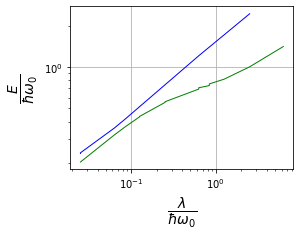

In [10]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(4,3))
 
axes.plot(d_values, g_values, 'green', linewidth=1)
axes.plot(d_values2, g_values2, 'blue', linewidth=1)

plt.yscale("log")
plt.xscale("log")
plt.grid(True)

axes.set_ylabel(r"$\frac{E}{\hbar\omega_{0}}$", fontsize=20)
axes.set_xlabel(r"$\frac{\lambda}{\hbar\omega_{0}}$", fontsize=20)